### This notebook shows some exploration and data analysis about the Youtube toxicity dataset.

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


### Plot functions

#### We used interactives graphs. So please rerun the code to see the plots in case they don't show

In [187]:
def figfunc(x_, y_, title_, x_title, y_title, height_, width_):
    fig = go.Figure(go.Bar(
        x=x_,y=y_,marker={'colorscale': 'RdBu'},
    ))
    fig.update_layout(title_text=title_,xaxis_title=x_title,yaxis_title=y_title,height=height_,width=width_,title_x=0.5)
    fig.show()
    return

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(8,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    plot = sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    plot.set_xlim(-10, df[feature].max())
    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
def plot_grouped(grouped, by, x):
  data = grouped.sort_values(by=by, ascending=False)
  plt.figure(figsize=(100,20))
  return sns.barplot(data=grouped, x=data[x], y=data[by])

def customized_scatterplot(y, x):
    import matplotlib.style as style
    ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable
    sns.scatterplot(y = y, x = x);

## Import Data

In [153]:
# Load the data
def load_format_dataset(path='challenge_youtube_toxic.csv'):
    df = pd.read_csv("challenge_youtube_toxic.csv",encoding = 'latin-1',delimiter=";")
    return df

In [154]:
df = load_format_dataset(path='challenge_youtube_toxic.csv')
df.head()

,video_id_court,video_id,channel_id,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,...,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,Unnamed: 27
0,Uvvsvw_wxOs,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z,UC9GGzAhhvhJO1hL10-BcgNA,3813,18,4,145,79,60,"30,2619",...,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,nan
1,mCy1ZBdttwA,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB,UCXKJrYczY2_fJEZgFPGY0HQ,28,2,0,1,0,0,"9,333333",...,0,3,1,0,CNEWS,189971,132125693,Core,TV,nan
2,iU3MyHMK5nU,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V,UC9GGzAhhvhJO1hL10-BcgNA,3804,68,9,56,75,54,"27,56522",...,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,nan
3,ZUim3AeURtk,VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr,UCbZ0Csr9ow6Xjkdd542Omhw,4,0,1,2,0,0,2,...,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,nan
4,n5Tg2vhLCAM,VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN,UChZWs6PJY0hND384d2_RrhQ,737,3,1,18,5,6,"32,04347826",...,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,nan


In [155]:
df.describe()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,viewCount,Unnamed: 27
count,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,46102.00,0.00
mean,1435.85,9.42,3.97,21.92,21.82,13.59,22.22,25.70,47.92,5.04,28.73,14.50,10.97,172108.75,92550609.75,nan
std,7670.79,61.62,21.37,130.04,120.61,68.80,117.44,130.74,234.79,19.58,140.33,56.25,50.61,119508.32,67783024.09,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,31091.00,nan
25%,18.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,87793.00,46356344.00,nan
50%,72.00,0.00,0.00,0.00,1.00,1.00,3.00,0.00,4.00,0.00,3.00,2.00,1.00,180173.00,63880931.00,nan
75%,398.00,3.00,1.00,6.00,9.00,4.00,9.00,5.00,16.00,2.00,11.00,7.00,4.00,217835.00,132125693.00,nan
max,662808.00,7227.00,1416.00,14270.00,11093.00,5520.00,8734.00,11195.00,19336.00,1235.00,9837.00,3762.00,3732.00,568615.00,241435040.00,nan


## Columns types

In [156]:
df.dtypes

video_id_court              object
video_id                    object
channel_id                  object
nbrMot                       int64
nbrMotInsulte                int64
nbrMotAllong                 int64
nbrMotMAJ                    int64
nbrExclMark                  int64
nbrQuestMark                 int64
nbrMotMoyenne               object
nbrMotInsulteMoyenne        object
nbrMotAllongMoyenne         object
nbrMotMAJMoyenne            object
nbrExclMarkMoyenne          object
nbrQuestMarkMoyenne         object
thread_count                 int64
comment_count                int64
message_count                int64
discussion_count             int64
distinct_authors_count       int64
authors_3channels_count      int64
liked_authors_count          int64
channel_name                object
subscriberCount              int64
viewCount                    int64
categorie_new               object
categ_inst                  object
Unnamed: 27                float64
dtype: object

* We have to convert columns with object type to the normal type 'float64'. 

In [157]:
for i in df.columns:
        if (i.startswith('nbr') & (df[i].dtype=='O')):
            df[i] = df[i].apply(lambda x: float(x.replace(',','.')))

In [158]:
df.dtypes

video_id_court              object
video_id                    object
channel_id                  object
nbrMot                       int64
nbrMotInsulte                int64
nbrMotAllong                 int64
nbrMotMAJ                    int64
nbrExclMark                  int64
nbrQuestMark                 int64
nbrMotMoyenne              float64
nbrMotInsulteMoyenne       float64
nbrMotAllongMoyenne        float64
nbrMotMAJMoyenne           float64
nbrExclMarkMoyenne         float64
nbrQuestMarkMoyenne        float64
thread_count                 int64
comment_count                int64
message_count                int64
discussion_count             int64
distinct_authors_count       int64
authors_3channels_count      int64
liked_authors_count          int64
channel_name                object
subscriberCount              int64
viewCount                    int64
categorie_new               object
categ_inst                  object
Unnamed: 27                float64
dtype: object

## Delete duplicated rows (if they exist)

In [159]:
df.drop_duplicates()

,video_id_court,video_id,channel_id,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,...,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,Unnamed: 27
0,Uvvsvw_wxOs,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z,UC9GGzAhhvhJO1hL10-BcgNA,3813,18,4,145,79,60,30.26,...,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,nan
1,mCy1ZBdttwA,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB,UCXKJrYczY2_fJEZgFPGY0HQ,28,2,0,1,0,0,9.33,...,0,3,1,0,CNEWS,189971,132125693,Core,TV,nan
2,iU3MyHMK5nU,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V,UC9GGzAhhvhJO1hL10-BcgNA,3804,68,9,56,75,54,27.57,...,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,nan
3,ZUim3AeURtk,VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr,UCbZ0Csr9ow6Xjkdd542Omhw,4,0,1,2,0,0,2.00,...,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,nan
4,n5Tg2vhLCAM,VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN,UChZWs6PJY0hND384d2_RrhQ,737,3,1,18,5,6,32.04,...,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,0s_hwJrt_6E,VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LjBzX2h3SnJ0XzZF,UCfHn_8-ehdem86fEvlFg-Gw,16,0,0,0,3,0,5.33,...,0,3,1,0,Le Parisien,149018,85536183,Core,Presse_regionale,nan
46098,ktsFSiFN1VY,VVVZcFJEbmhrNUg4aDE2anBTODR1cXNBLmt0c0ZTaUZOMVZZ,UCYpRDnhk5H8h16jpS84uqsA,228,1,1,0,0,1,228.00,...,0,1,0,0,Le Monde,568615,134570352,Core,Presse nationale,nan
46099,-Zl5CiKdfAs,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLi1abDVDaUtkZkFz,UCXKJrYczY2_fJEZgFPGY0HQ,287,2,0,3,2,0,35.88,...,0,7,5,3,CNEWS,189971,132125693,Core,TV,nan
46100,CyHXcpFlrTg,VVVDRHpfWFllS1dkME9JeWpwOTVkcXlRLkN5SFhjcEZsclRn,UCCDz_XYeKWd0OIyjp95dqyQ,176,0,0,0,6,3,58.67,...,1,3,0,1,Le Figaro,180173,140135417,Core,Presse nationale,nan


## Delete the useless columns 

In [160]:
df = df.drop(['Unnamed: 27'],1)
df.drop( axis=1,columns='video_id_court' ,inplace=True)
df.drop( axis=1,columns='video_id' ,inplace=True)
df.drop( axis=1,columns='channel_id' ,inplace=True)

## Dealing with missing Data

In [161]:
df.isnull().sum()

nbrMot                     0
nbrMotInsulte              0
nbrMotAllong               0
nbrMotMAJ                  0
nbrExclMark                0
nbrQuestMark               0
nbrMotMoyenne              0
nbrMotInsulteMoyenne       0
nbrMotAllongMoyenne        0
nbrMotMAJMoyenne           0
nbrExclMarkMoyenne         0
nbrQuestMarkMoyenne        0
thread_count               0
comment_count              0
message_count              0
discussion_count           0
distinct_authors_count     0
authors_3channels_count    0
liked_authors_count        0
channel_name               0
subscriberCount            0
viewCount                  0
categorie_new              0
categ_inst                 0
dtype: int64

* No missing values

## Dealing with erroneous information

In [162]:
df[df['nbrMotInsulte'] > df['nbrMot']]

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,...,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst
39864,5,6,0,0,2,0,5.00,6.00,0.00,0.00,...,1,0,1,0,0,Lequipe,217835,63880931,Niche,Presse nationale


* It's impossible to have a number of insult words greator than the number of words this row contains wrong data it's better to remove it or to fix and make the number of insults lower

## Average number of «insult» words

In [163]:
df1 = load_format_dataset(path='challenge_youtube_toxic.csv')
for i in df.columns:
        if (i.startswith('nbr') & (df[i].dtype=='O')):
            df[i] = df[i].apply(lambda x: float(x.replace(',','.')))

In [164]:
mean_categ_inst= df1.groupby(['categ_inst']).agg('mean')['nbrMotInsulte'].nlargest(6).to_frame(name='mean').reset_index()
figfunc(x_=mean_categ_inst['categ_inst'], y_=mean_categ_inst['mean'], title_="Average number of «insult» words per video by categ_inst", x_title="categ_inst", y_title="mean_nbrMotInsulte", height_=600, width_=600)

In [165]:
mean_categorie_new= df1.groupby(['categorie_new']).agg('mean')['nbrMotInsulte'].nlargest(3).to_frame(name='mean').reset_index()
figfunc(x_=mean_categorie_new['categorie_new'], y_=mean_categorie_new['mean'], title_="Average number of «insult» words per video by categorie_new", x_title="categorie_new", y_title="mean_nbrMotInsulte", height_=600, width_=600)

In [166]:
mean_channel_name= df1.groupby(['channel_name']).agg('mean')['nbrMotInsulte'].nlargest(48).to_frame(name='mean').reset_index()
figfunc(x_=mean_channel_name['channel_name'], y_=mean_channel_name['mean'], title_="Average number of «insult» words per video by channel", x_title="channel_name", y_title="mean_nbrMotInsulte", height_=600, width_=1000)

In [167]:
mean_subscriberCount= df.groupby(['subscriberCount']).agg('mean')['nbrMotInsulte'].nlargest(48).to_frame(name='mean').reset_index()
mean_subscriberCount

,subscriberCount,mean
0,74,97.00
1,113042,32.21
2,149018,27.70
3,568615,25.17
4,246505,23.62
5,339922,20.52
6,135512,19.84
7,154937,12.30
8,382,12.00
9,21736,9.83


In [168]:
#Add groups of number of words
bins = [0,1,50,100,500,1000,5000,10000,50000,100000,200000,300000,400000,1000000]
group_word = ['0_1','2_50', '51_100','101_500','501_1000','1001_5000','5001_10000', '10001_50000', '50001_100000', '100001_200000','200001_300000','300001_400000', 'p400000']
df1['nbrMot'] = pd.cut(df1['nbrMot'], bins, labels= group_word)

In [169]:
mean_nbrMot= df1.groupby(['nbrMot']).agg('mean')['nbrMotInsulte'].nlargest(12).to_frame(name='mean').reset_index()
figfunc(x_=mean_nbrMot['nbrMot'], y_=mean_nbrMot['mean'], title_="Average number of « insult » words by total number of words in the video", x_title="nbrMot", y_title="mean_nbrMotInsulte", height_=600, width_=800)

In [170]:
#Add groups of number of messages
bins = [0,1,10,25,50,100,250,500,1000,2000,3000,4000,5000,6000,8000]
group_message = ['0_1','2_10', '11_25','26_50','51_100','101_250','251_500', '501_1000', '1001_2000', '2001_3000','3001_4000','4001_5000','5001_6000', 'p6000']
df1['message_count'] = pd.cut(df1['message_count'], bins, labels= group_message)

In [171]:
mean_message_count= df1.groupby(['message_count']).agg('mean')['nbrMotInsulte'].nlargest(14).to_frame(name='mean').reset_index()
figfunc(x_=mean_message_count['message_count'], y_=mean_nbrMot['mean'], title_="Average number of « insult » words per number of all comments posted in a video", x_title="message_count", y_title="mean_nbrMotInsulte", height_=600, width_=800)

In [172]:
#Add groups of number of long words
bins = [0,1,10,25,50,75,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,1500]
group_nbrMotAllong = ['0_1','2_10', '11_25','26_50','51_75','75_100','101_150', '151_200', '201_250', '251_300','301_350','351_400','401_450', '451,500','501_550','551_600','601_650','651,700','701_750','751_800','p800']
df1['nbrMotAllong'] = pd.cut(df1['nbrMotAllong'], bins, labels= group_nbrMotAllong)

In [173]:
mean_nbrMotAllong= df1.groupby(['nbrMotAllong']).agg('mean')['nbrMotInsulte'].nlargest(19).to_frame(name='mean').reset_index()
figfunc(x_=mean_nbrMotAllong['nbrMotAllong'], y_=mean_nbrMotAllong['mean'], title_="Average number of « insult » words per number of long words in a video", x_title="nbrMotAllong", y_title="mean_nbrMotInsulte", height_=600, width_=800)

In [174]:
#Add groups of uppercase words
bins = [0,1,10,25,50,75,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,1000,2000,3000,4000,5000,6000,15000]
group_nbrMotMAJ = ['0_1','2_10', '11_25','26_50','51_75','75_100','101_150', '151_200', '201_250', '251_300','301_350','351_400','401_450', '451,500','501_550','551_600','601_650','651,700','701_750','751_800','800_1000','1001_2000','2001_3000','3001_4000','4001_5000','5001_6000','p6000']
df1['nbrMotMAJ'] = pd.cut(df1['nbrMotMAJ'], bins, labels= group_nbrMotMAJ)

In [175]:
mean_nbrMotMAJ= df1.groupby(['nbrMotMAJ']).agg('mean')['nbrMotInsulte'].nlargest(26).to_frame(name='mean').reset_index()
figfunc(x_=mean_nbrMotMAJ['nbrMotMAJ'], y_=mean_nbrMotMAJ['mean'], title_="Average number of « insult » words per number of capitalized words in a video", x_title="nbrMotMAJ", y_title="mean_nbrMotInsulte", height_=600, width_=800)

In [176]:
#Add groups of number of exclamations
bins = [0,1,10,25,50,75,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,1000,2000,3000,4000,5000,6000,12000]
group_nbrExclMark = ['0_1','2_10', '11_25','26_50','51_75','75_100','101_150', '151_200', '201_250', '251_300','301_350','351_400','401_450', '451,500','501_550','551_600','601_650','651,700','701_750','751_800','800_1000','1001_2000','2001_3000','3001_4000','4001_5000','5001_6000','p6000']
df1['nbrExclMark'] = pd.cut(df1['nbrExclMark'], bins, labels= group_nbrExclMark)

In [177]:
mean_nbrExclMark= df1.groupby(['nbrExclMark']).agg('mean')['nbrMotInsulte'].nlargest(100).to_frame(name='mean').reset_index()
figfunc(x_=mean_nbrExclMark['nbrExclMark'], y_=mean_nbrExclMark['mean'], title_="Average number of « insult » words per number of exclamations in a video", x_title="nbrExclMark", y_title="mean_nbrMotInsulte", height_=600, width_=800)

In [178]:
#Add groups of question mark numberAverage number of « insult » words per number of questions mark in a video
bins = [0,1,10,25,50,75,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,1000,2000,3000,4000,5000,8000,10000]
group_nbrQuestMark = ['0_1','2_10', '11_25','26_50','51_75','75_100','101_150', '151_200', '201_250', '251_300','301_350','351_400','401_450', '451,500','501_550','551_600','601_650','651,700','701_750','751_800','800_1000','1001_2000','2001_3000','3001_4000','4001_5000','5001_8000','p8000']
df1['nbrQuestMark'] = pd.cut(df1['nbrQuestMark'], bins, labels= group_nbrQuestMark)

In [179]:
mean_nbrQuestMark= df1.groupby(['nbrQuestMark']).agg('mean')['nbrMotInsulte'].nlargest(60).to_frame(name='mean').reset_index()
figfunc(x_=mean_nbrQuestMark['nbrQuestMark'], y_=mean_nbrQuestMark['mean'], title_="Average number of « insult » words per number of questions mark in a video", x_title="nbrQuestMark", y_title="mean_nbrMotInsulte", height_=600, width_=800)

## The number of insults words per video

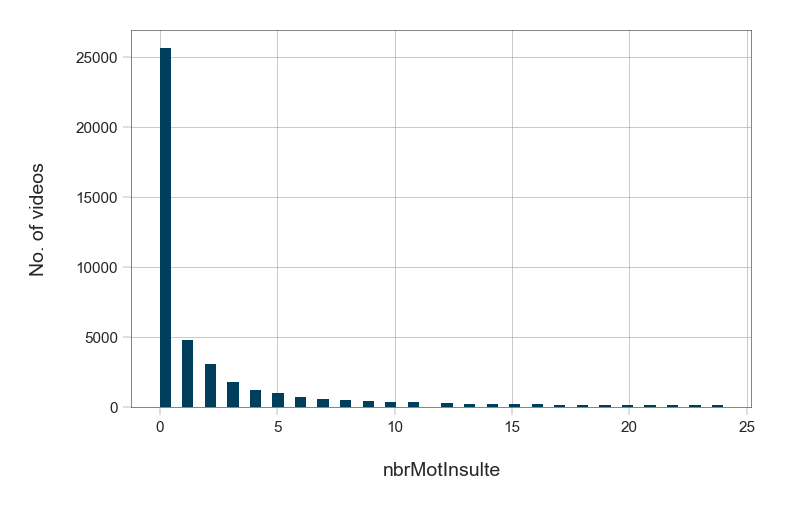

In [180]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["nbrMotInsulte"] < 25e0]["nbrMotInsulte"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="nbrMotInsulte", ylabel="No. of videos")

### Videos without insultes

In [181]:
df[df['nbrMotInsulte'] < 1]['nbrMotInsulte'].count() / df['nbrMotInsulte'].count() * 100

55.73077089931022

55 % of videos without insultes.

## Correlation between dataset variables

**No or Little multicollinearity**: 

Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:

* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.

* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects.

* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant.

**Heatmap** is an excellent way to identify whether there is multicollinearity or not. 


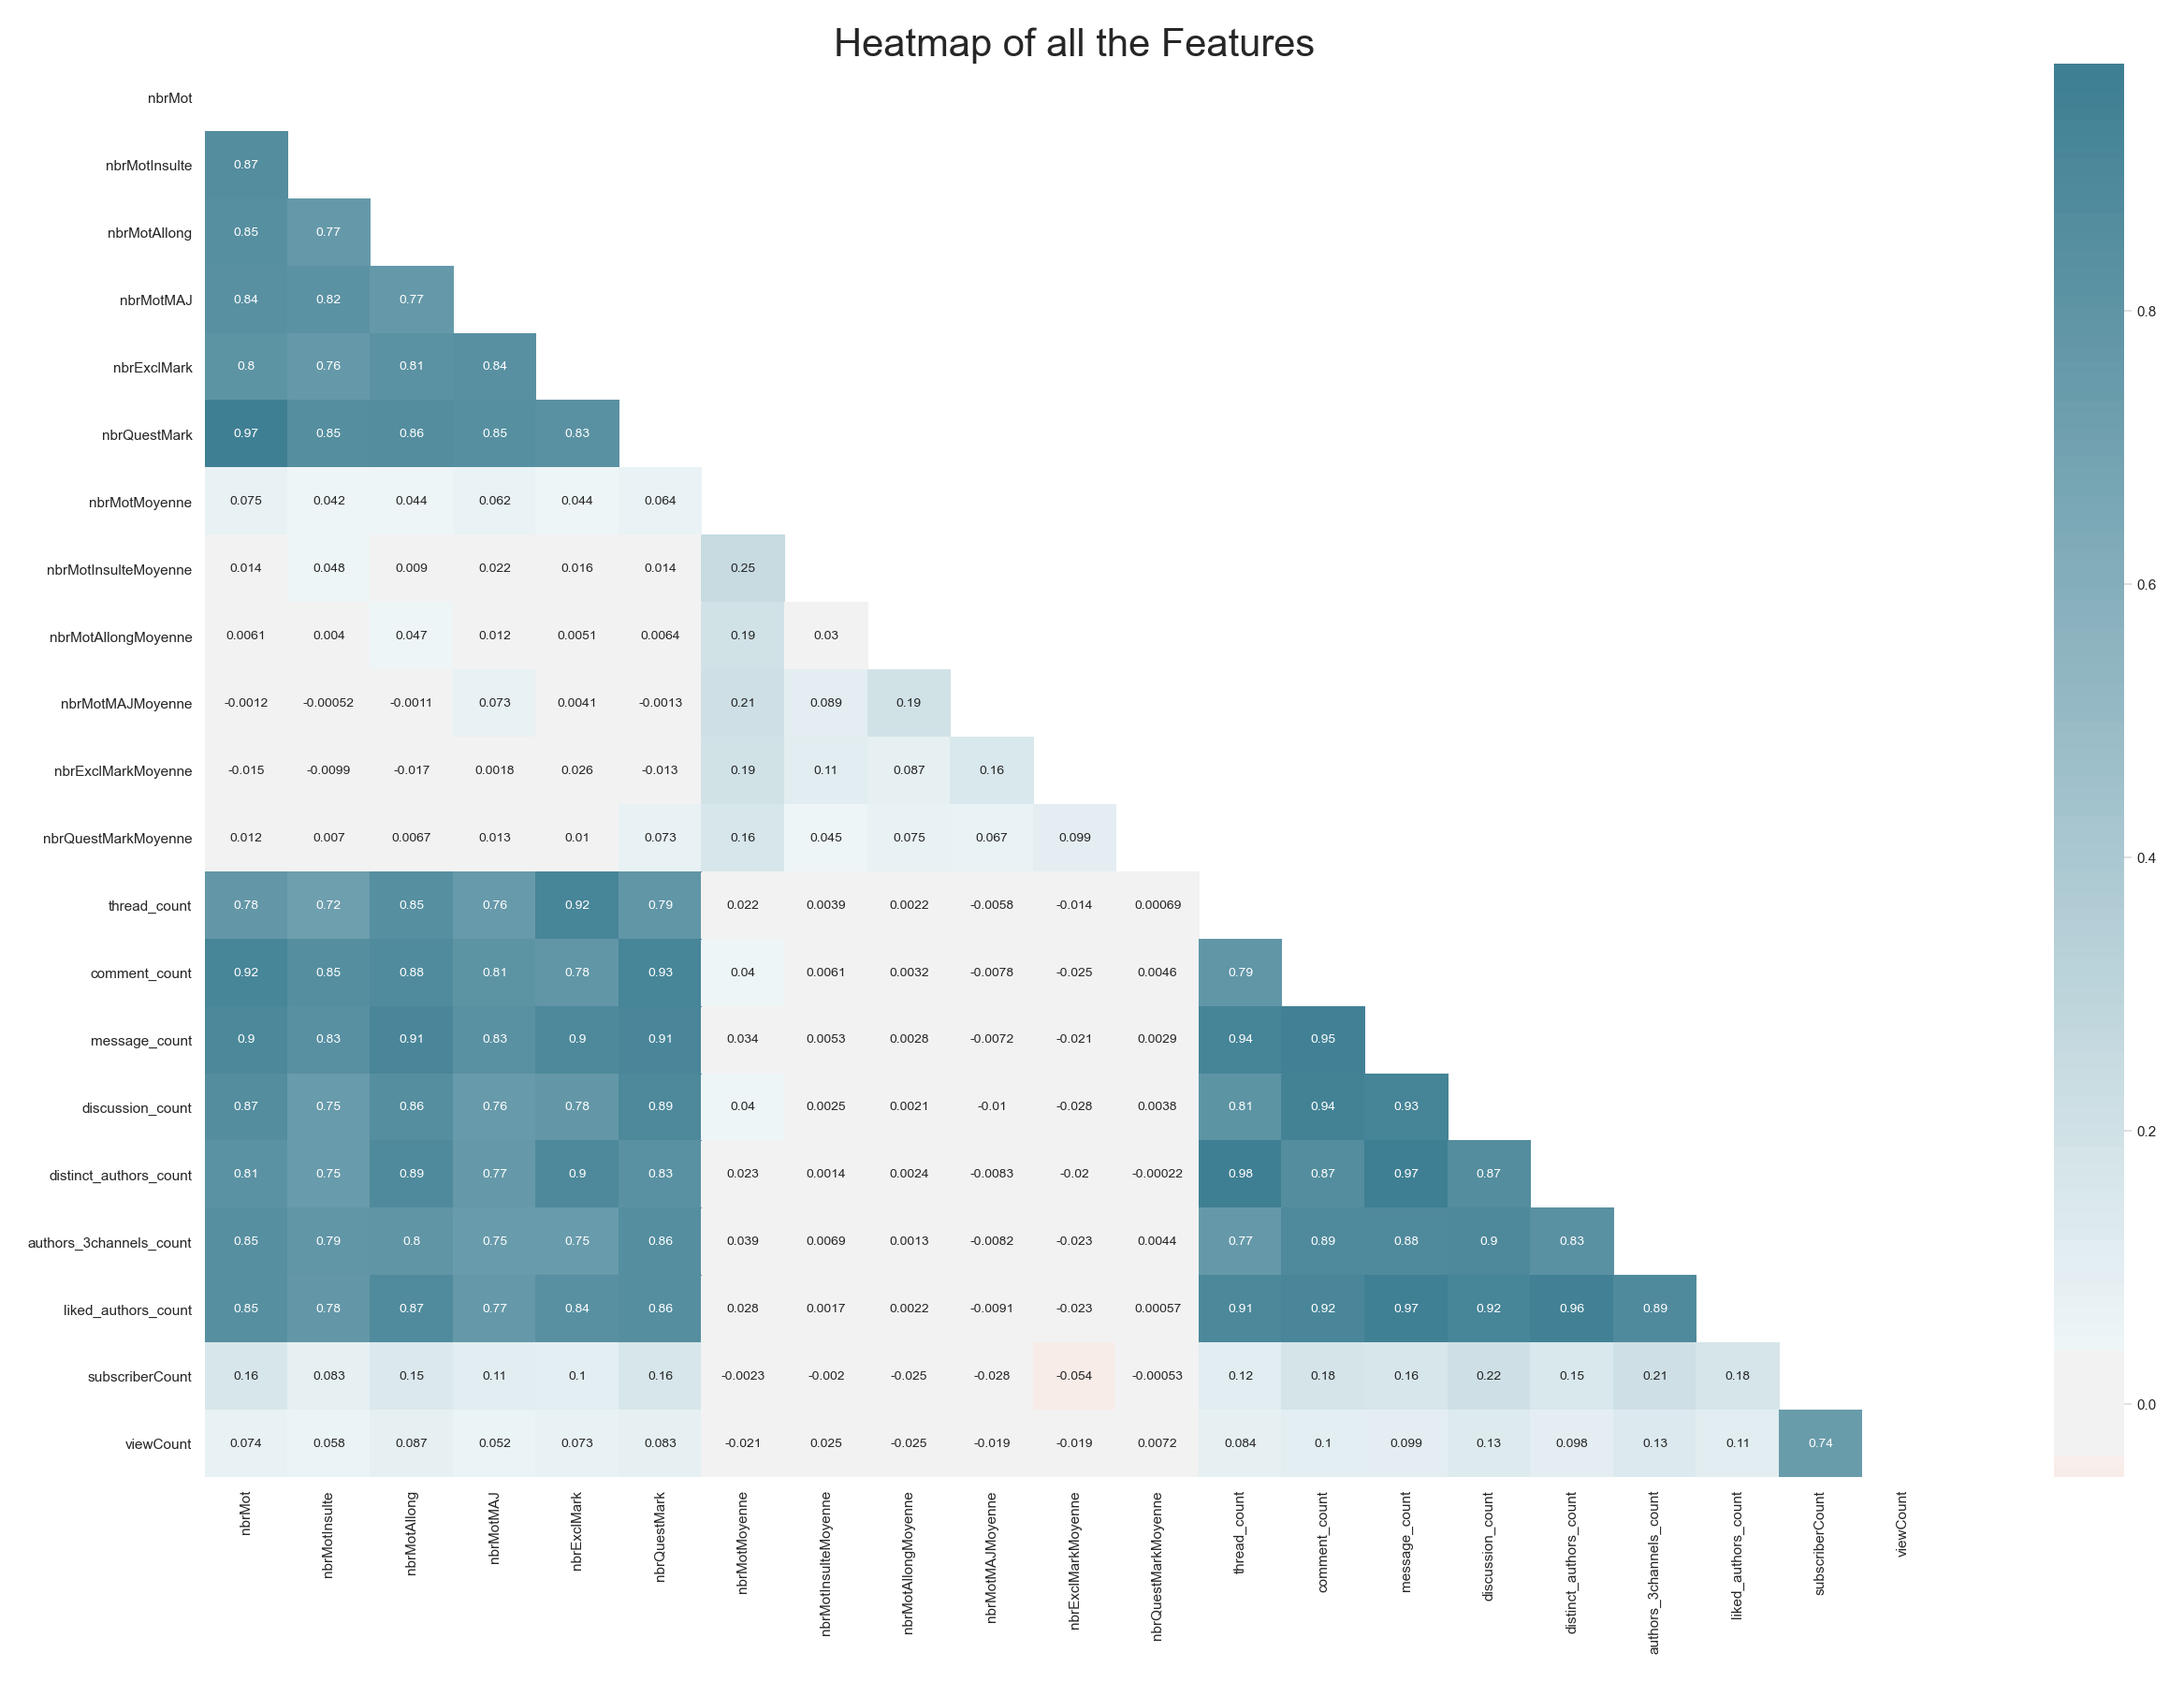

In [193]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

As we can see, the multicolinearity exists in various features.
* nbrMot:

85% with nbrMotAllong

84% with nbrMotMaj

97% with nbrQuestMark

92% with comment_count

* We can see that the number of insults is highly corrolated with practacly all the couluns it is a good thing because we will use them to predict this number. 
* NbreMotInsulte is highly correlated with NbMot wich is logic but we can see that it's correlated also with NbreMotAllonge and NbreQuestMark.
* Let's verify that by plotting a scatter plot between NbreMotInsulte and NbreMotAllonge to visualize the relationship between these variables.
* Same for NbreMotInsulte and NbreQuestMark

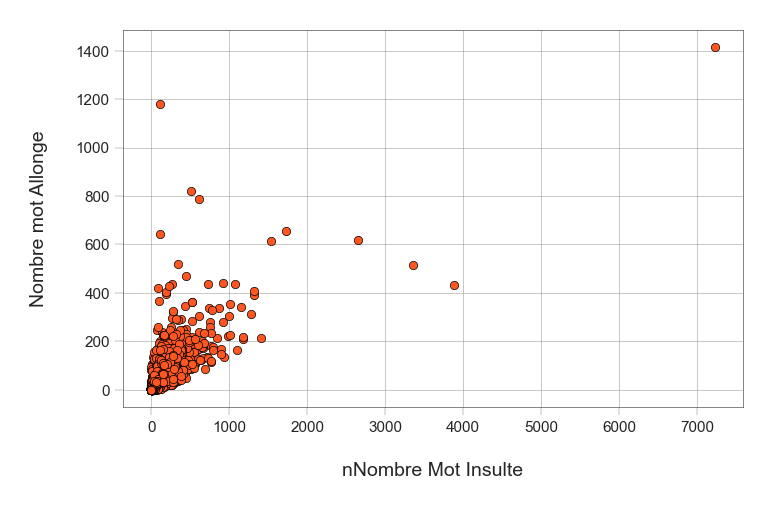

In [184]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['nbrMotInsulte'], y=df['nbrMotAllong'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="nNombre Mot Insulte", ylabel="Nombre mot Allonge")

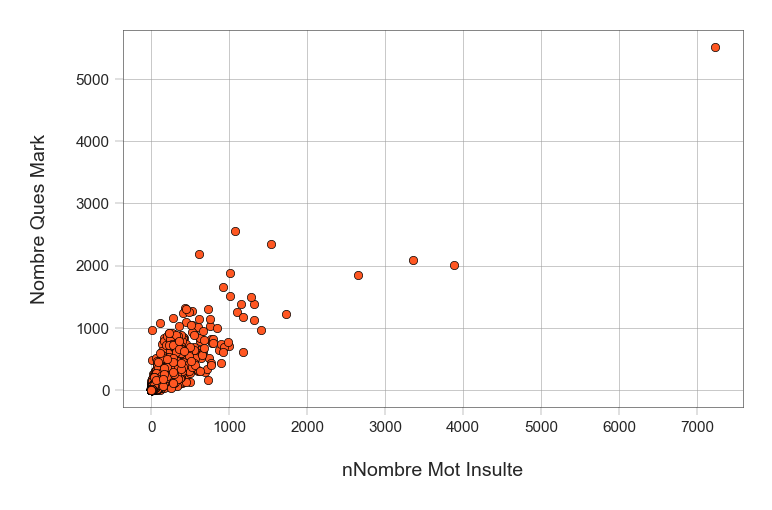

In [185]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['nbrMotInsulte'], y=df['nbrQuestMark'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="nNombre Mot Insulte", ylabel="Nombre Ques Mark")

* We can see that our data is not normally distributed. 
* Existance of outliers. 

## Skewness and kurtosis

**Skewness** : 

is the degree of distortion from the symmetrical bell curve or the normal curve.
So, a symmetrical distribution will have a skewness of "0".

*   Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.

In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means most videos contain less than the average number of insult words.
*   Élément de liste


**Kurtosis** : 
According to Wikipedia,

In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability. So, In other words, it is the measure of the extreme values(outliers) present in the distribution.

In [188]:
#skewness and kurtosis
print("Skewness: " + str(df['nbrMotInsulte'].skew()))
print("Kurtosis: " + str(df['nbrMotInsulte'].kurt()))

Skewness: 50.676406587237295
Kurtosis: 4763.3231401594085


1.   Our target variable, nbrMotInsulte is not normally distributed.
2.   Our target variable is right-skewed.
3.   There are multiple outliers in the variable.

**We can fix this by using different types of transformation**

**Based on our visualization (existence of outliers) we will use the mean absolute error for the regression problem**
